<img src="https://raw.githubusercontent.com/Sengsathit/OCR_data_scientist_assets/main/header_pret_a_depenser.png" alt="Alternative text" />

# Introduction

Ce notebook a pour objectif de réaliser une analyse exploratoire des données et du feature engineering en s'inspirant d'un kernel existant disponible sur Kaggle [Start Here - A Gentle Introduction](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook). L'utilisation de ce kernel permet de réduire significativement le temps consacré à la préparation des données en tirant parti de code préexistant.

Le kernel a été adapté pour ne conserver que les parties qui correspondent aux besoins spécifiques de notre projet de modélisation. Nous avons supprimé les sections qui ne sont pas directement pertinentes, afin de nous concentrer uniquement sur les transformations et les analyses qui apporteront une valeur ajoutée à notre travail comme par exemple le feature engineering basé sur les problèmatiques métiers.

# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

warnings.filterwarnings('ignore')

# Configurer Pandas pour un affichage complet du contenu des colonnes
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Aperçu des données

Il y a 9 fichiers de données : 
- 1 fichier principal pour l'entraînement
- 1 fichier principal pour le test
- 1 fichier d'extraits de soumission à Kaggle
- 6 fichiers d'informations complémentaires à propos de chaque emprunt de client

Le fichier des données d'**entraînement** comporte :
- 307511 observations représentant autant d'emprunt unique
- 122 variables (dont 1 variable correspondant aux labels)

In [2]:
# Données d'entraînement
df_train = pd.read_csv('datasets/application_train.csv')
print('Forme des données d\'entraînement : ', df_train.shape)
df_train.head()

Forme des données d'entraînement :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Le fichier des données de **test** comporte :
- 48744 observations représentant autant d'emprunt unique
- 121 variables

In [3]:
# Données de test
df_test = pd.read_csv('datasets/application_test.csv')
print('Forme des données de test : ', df_test.shape)
df_test.head()

Forme des données de test :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

# Exploration des données

## Examen de la distribution des labels

Nous constatons un déséquilibre au niveau des classes 0 et 1. En effet, il y a bien plus de prêts qui ont été remboursés à temps (0) que de prêts qui n'ont pas été remboursés (1).

Nous pourrons, par la suite, pondérer ces deux classes en fonction de leur représentation dans les données pour tenir compte de ce déséquilibre.

In [4]:
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

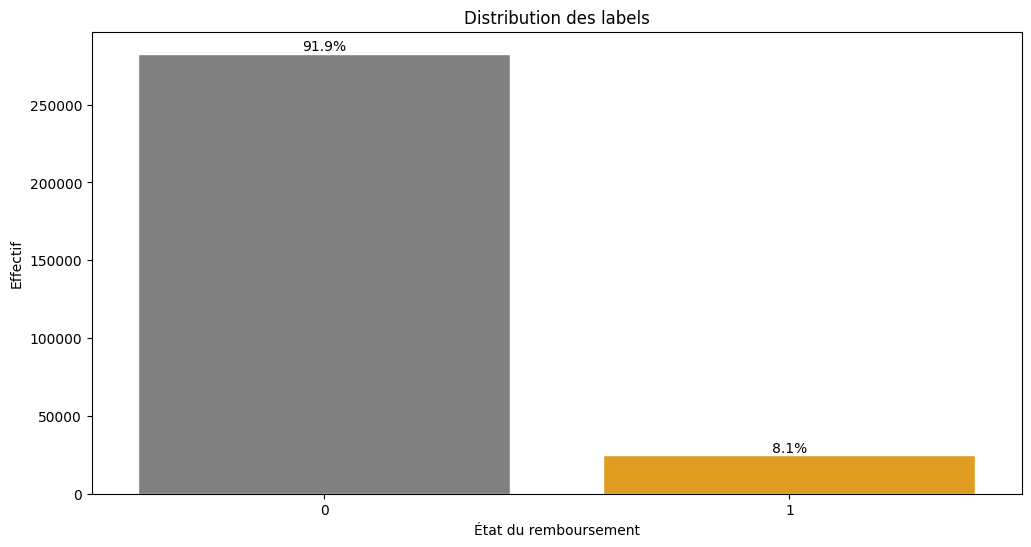

In [5]:
# Calculer les effectifs pour chaque classe
target_counts = df_train['TARGET'].astype(int).value_counts().reset_index()
target_counts.columns = ['État du remboursement', 'Effectif']

# Calculer les pourcentages
total = target_counts['Effectif'].sum()
target_counts['Pourcentage'] = (target_counts['Effectif'] / total) * 100

# Créer une palette de couleurs pour les classes
colors = ['grey' if x == 0 else 'orange' for x in target_counts['État du remboursement']]

# Créer le bar plot avec les couleurs personnalisées
plt.figure(figsize=(12,6))
ax = sns.barplot(x='État du remboursement', y='Effectif', data=target_counts, palette=colors, edgecolor='w')

# Ajouter les annotations des pourcentages au-dessus des barres
for index, row in target_counts.iterrows():
    ax.text(index, row['Effectif'], f'{row["Pourcentage"]:.1f}%', color='black', ha="center", va='bottom')

# Ajuster le titre et les étiquettes
plt.title('Distribution des labels')
plt.xlabel('État du remboursement')
plt.ylabel('Effectif')

plt.show()

## Examen des valeurs manquantes

In [6]:
# Fonction pour calculer les valeurs manquantes par colonne
def missing_values_table(df):
        # Total des valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Pourcentage des valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Créer un tableau avec les résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renommer les colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs Manquantes', 1 : '% du Total des Valeurs'})
        
        # Trier le tableau par pourcentage de valeurs manquantes de manière décroissante
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% du Total des Valeurs', ascending=False).round(1)
        
        # Imprimer un résumé d'information
        print ("Le dataframe sélectionné a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Retourner le dataframe avec les informations sur les valeurs manquantes
        return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(df_train)
missing_values.head(20)

Le dataframe sélectionné a 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


,Valeurs Manquantes,% du Total des Valeurs
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Examen des types de variables

In [8]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

## Examen des valeurs uniques

En examinant le nombre de valeur unique pour chaque variable catégorielles, on constate que la plupart des variables catégorielles ont un nombre relativement restreint de valeurs uniques. 

In [9]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encodage des variables catégorielles

### Label Encoding et One-Hot Encoding

Pour toute variable catégorielle avec 2 catégories uniques nous utilison `LabelEncoder`, pour toute variable catégorielle avec plus de 2 catégories uniques, nous utiliserons le one-hot encoding `get_dummies()`.

In [10]:
# Créer un objet LabelEncoder
le = LabelEncoder()
le_count = 0

# Itérer à travers les colonnes
for col in df_train:
    if df_train[col].dtype == 'object':
        # S'il y a 2 catégories uniques ou moins
        if len(list(df_train[col].unique())) <= 2:
            # Entraîner sur les données d'entraînement
            le.fit(df_train[col])
            # Transformer les données d'entraînement et de test
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Garder une trace du nombre de colonnes encodées par labels
            le_count += 1
            
print('%d colonnes ont été encodées par labels.' % le_count)

3 colonnes ont été encodées par labels.


In [11]:
# One-hot encoding des variables catégorielles
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Forme des données d\'entraînement : ', df_train.shape)
print('Forme des données de test : ', df_test.shape)

Forme des données d'entraînement :  (307511, 243)
Forme des données de test :  (48744, 239)


### Alignement des données d'entraînement et des données de test

Il doit y avoir les mêmes caractéristiques (colonnes) dans les données d'entraînement et de test. Le one-hot encoding a créé plus de colonnes dans les données d'entraînement parce qu'il y avait des variables catégorielles avec des catégories non représentées dans les données de test. Pour supprimer les colonnes dans les données d'entraînement qui ne sont pas présentes dans les données de test, nous devons `aligner` les dataframes.

Tout d'abord, nous extrayons la colonne des labels des données d'entraînement (car elle n'est pas présente dans les données de test, mais nous devons conserver cette information).

In [12]:
train_labels = df_train['TARGET']

df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

df_train['TARGET'] = train_labels

print('Forme des données d\'entraînement : ', df_train.shape)
print('Forme des données de test : ', df_test.shape)

Forme des données d'entraînement :  (307511, 240)
Forme des données de test :  (48744, 239)


## Retour à l'exploration des données

### Examen des erreurs dans les données

Les valeurs de la variable `DAYS_BIRTH` sont négatives car elles sont relative aux dates des emprunts

In [13]:
df_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

La converision des jours de naissance négatifs en années positives permet d'observer qu'il n'y à pas de valeurs extrêmes ni pour les âges supérieurs qu'inférieurs.

In [14]:
(df_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Il existe des valeurs aberrantes pour le nombre de jours en tant qu'employé

In [15]:
((df_train['DAYS_EMPLOYED'] * -1)).describe()

count    307511.000000
mean     -63815.045904
std      141275.766519
min     -365243.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

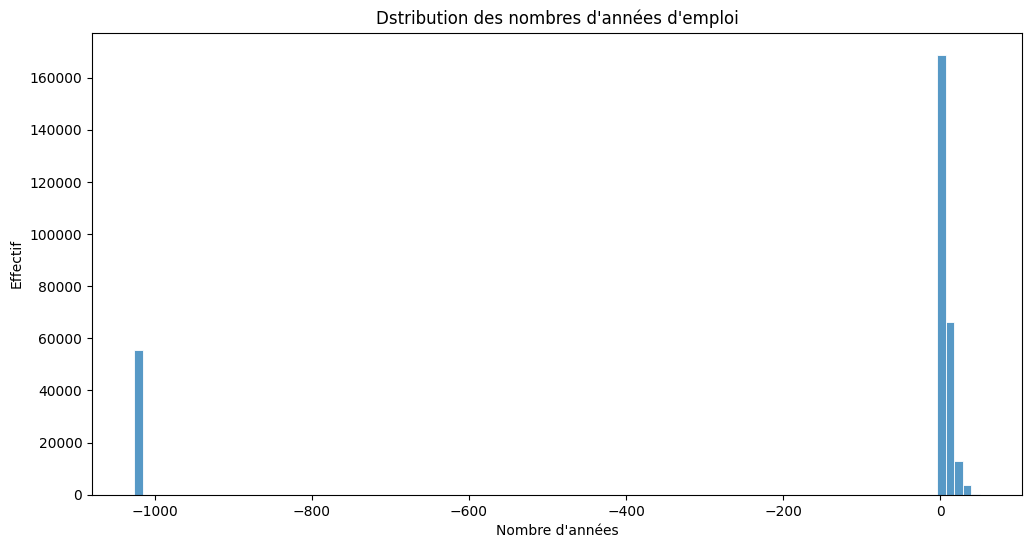

In [16]:
plt.figure(figsize=(12,6))
sns.histplot((df_train['DAYS_EMPLOYED'] / -356), bins=100, edgecolor = 'w')
plt.title('Dstribution des nombres d\'années d\'emploi')
plt.xlabel('Nombre d\'années')
plt.ylabel('Effectif')
plt.show()

Les clients ayant des valeurs anormales au niveau de leur nombre de jours d'emploi ont tendance à avoir des taux de défaut plus bas que le reste des clients.

In [17]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('Les non-anomalies font défaut sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies font défaut sur %0.2f%% des prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours d\'emploi anormaux' % len(anom))

Les non-anomalies font défaut sur 8.66% des prêts
Les anomalies font défaut sur 5.40% des prêts
Il y a 55374 jours d'emploi anormaux


Pour traiter les valeurs aberrantes, au niveau du nombre de jours d'emploi, nous procèderons à l'imputation des valeurs. En attendant nous remplaçons ces valeurs aberrantes avec des valeurs manquantes.

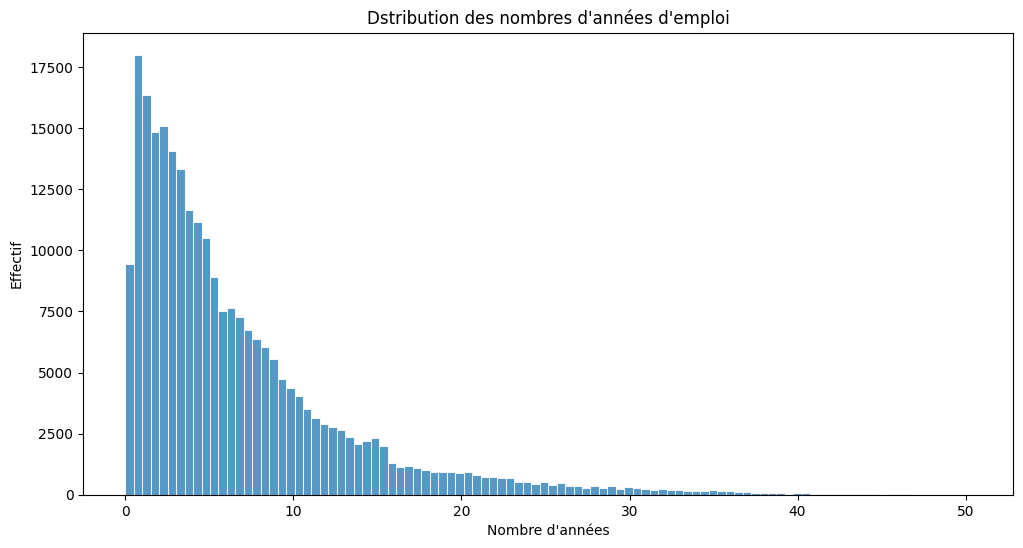

In [18]:
# Créer une colonne pour indiquer les anomalies
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs anormales par NaN
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plt.figure(figsize=(12,6))
sns.histplot((df_train['DAYS_EMPLOYED'] / -356), bins=100, edgecolor = 'w')
plt.title('Dstribution des nombres d\'années d\'emploi')
plt.xlabel('Nombre d\'années')
plt.ylabel('Effectif')
plt.show()

Nous appliquons le même principe de suppression des valeurs aberrantes aux données de test.

In [19]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans les données de test sur un total de %d entrées' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

Il y a 9274 anomalies dans les données de test sur un total de 48744 entrées


### Examen des correlations

Nous calculons le coefficient de correlation de Pearson entre chaque variables et la cible.

Nous estimons les niveaux de corrélation suivantes : 

* .00-.19 “très faible”
*  .20-.39 “faible”
*  .40-.59 “moyen”
*  .60-.79 “fort”
* .80-1.0 “très fort”

Bien que les valeurs soient faibles, nous pouvons constater qu'il y a probablement une relation entre l'âge et la cible.

In [20]:
# Trouver les corrélations avec la cible et trier
correlations = df_train.corr()['TARGET'].sort_values()

# Afficher les corrélations
print('Corrélations les plus fortes :\n', correlations.tail(15))
print('\nCorrélations les plus faibles :\n', correlations.head(15))

Corrélations les plus fortes :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Corrélat

### Effet de l'âge sur le remboursement

À mesure que le client vieillit, il y a une relation linéaire négative avec la cible, ce qui signifie que plus les clients sont âgés, plus ils ont tendance à rembourser leurs prêts à temps.

In [21]:
# Trouver la corrélation entre les jours positifs depuis la naissance et la cible
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982709

En soi, la distribution des âges ne nous dit pas grand-chose, si ce n'est qu'il n'y a pas de valeurs aberrantes puisque tous les âges sont raisonnables.

Pour visualiser l'effet de l'âge sur la cible, nous réalisons par la suite un graphique d'estimation de densité par noyau (KDE).

Text(0, 0.5, 'Effectif')

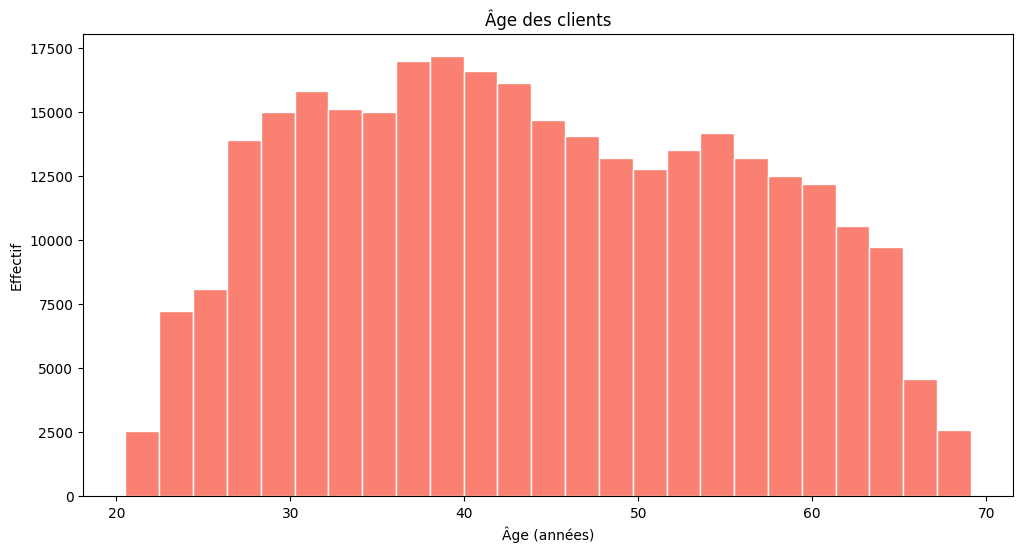

In [22]:
# Tracer la distribution des âges en années
plt.figure(figsize=(12,6))
plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'w', bins = 25, color="salmon")
plt.title('Âge des clients')
plt.xlabel('Âge (années)')
plt.ylabel('Effectif')

La courbe des défauts de remboursement suivante est plus orientée vers la partie la plus jeune de la plage d'âge. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,078), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. 

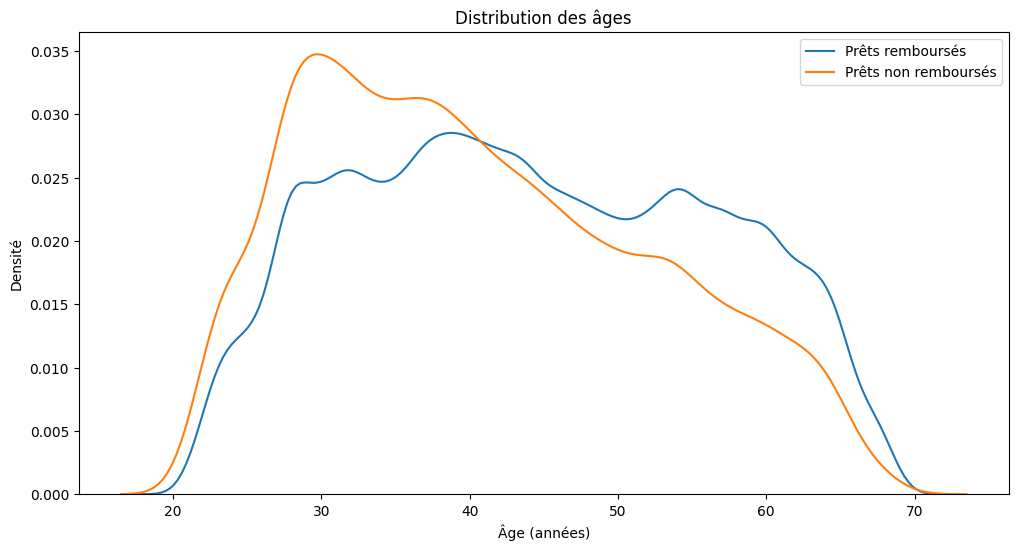

In [49]:
plt.figure(figsize = (12, 6))

sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Prêts remboursés')

sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'Prêts non remboursés')

plt.xlabel('Âge (années)')
plt.ylabel('Densité')
plt.title('Distribution des âges')

plt.legend()
plt.show()

### Taux moyen de non-remboursement des prêts par tranche d'âge

Il y a une tendance claire : les jeunes demandeurs sont plus susceptibles de ne pas rembourser le prêt. Le taux de non-remboursement est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus âgée.

In [24]:
# Informations sur l'âge dans un dataframe séparé
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] // 365  # Utilisation de la division entière pour obtenir des années entières

# Regrouper les données d'âge en tranches avec des années entières
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = range(20, 75, 5))  # Tranches de 5 ans entre 20 et 70 ans
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25,"(20, 25]"
1,0,16765,45,"(40, 45]"
2,0,19046,52,"(50, 55]"
3,0,19005,52,"(50, 55]"
4,0,19932,54,"(50, 55]"
5,0,16941,46,"(45, 50]"
6,0,13778,37,"(35, 40]"
7,0,18850,51,"(50, 55]"
8,0,20099,55,"(50, 55]"
9,0,14469,39,"(35, 40]"


In [25]:
# Grouper par tranche d'âge et calculer les moyennes
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20, 25]",0.117424,8730.418337,23.416743
"(25, 30]",0.112448,10460.685321,28.155777
"(30, 35]",0.099754,12214.783148,32.963841
"(35, 40]",0.086653,14052.994780,37.999794
"(40, 45]",0.077706,15851.460360,42.927870
"(45, 50]",0.072957,17680.316184,47.941489
"(50, 55]",0.064108,19537.165313,53.019489
"(55, 60]",0.054214,21338.919962,57.959080
"(60, 65]",0.052383,23100.613736,62.794450


Text(0.5, 1.0, "Échec de remboursement par tranche d'âge")

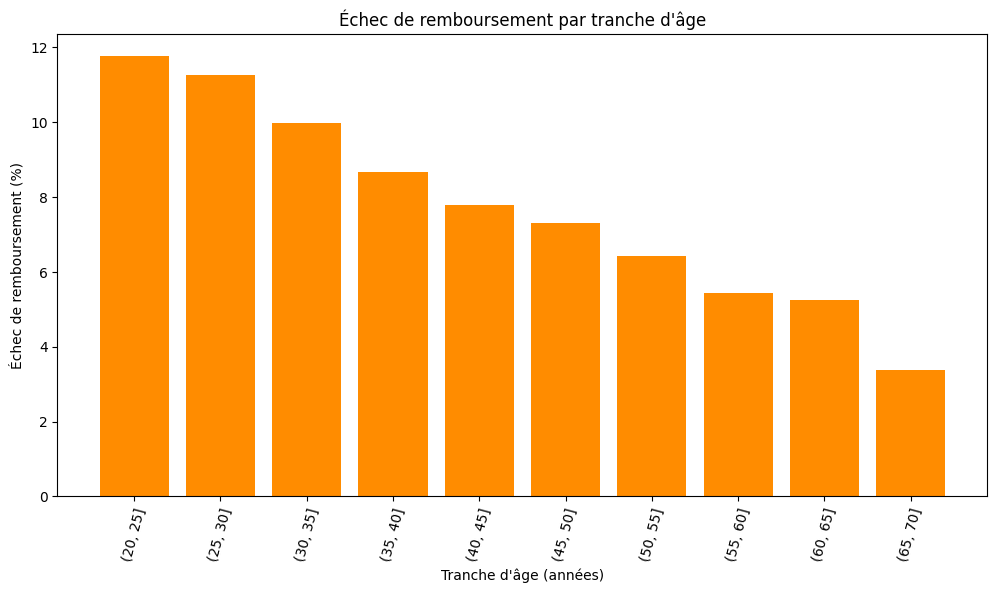

In [26]:
plt.figure(figsize = (12, 6))

# Graphique des tranches d'âge et de la moyenne de la cible sous forme de diagramme en barres
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='darkorange')

# Étiquetage du graphique
plt.xticks(rotation = 75)
plt.xlabel('Tranche d\'âge (années)')
plt.ylabel('Échec de remboursement (%)')
plt.title('Échec de remboursement par tranche d\'âge')

### Sources extérieures

Les 3 variables ayant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un "score normalisé provenant d'une source de données externe". 

Les trois caractéristiques `EXT_SOURCE` présentent des corrélations négatives avec la cible, ce qui indique que plus la valeur de `EXT_SOURCE` augmente, plus il est probable que le client rembourse le prêt. On peut également observer que `DAYS_BIRTH` est positivement corrélé avec `EXT_SOURCE_1`, ce qui pourrait indiquer que l'âge du client est peut-être l'un des facteurs pris en compte dans ce score.

In [27]:
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


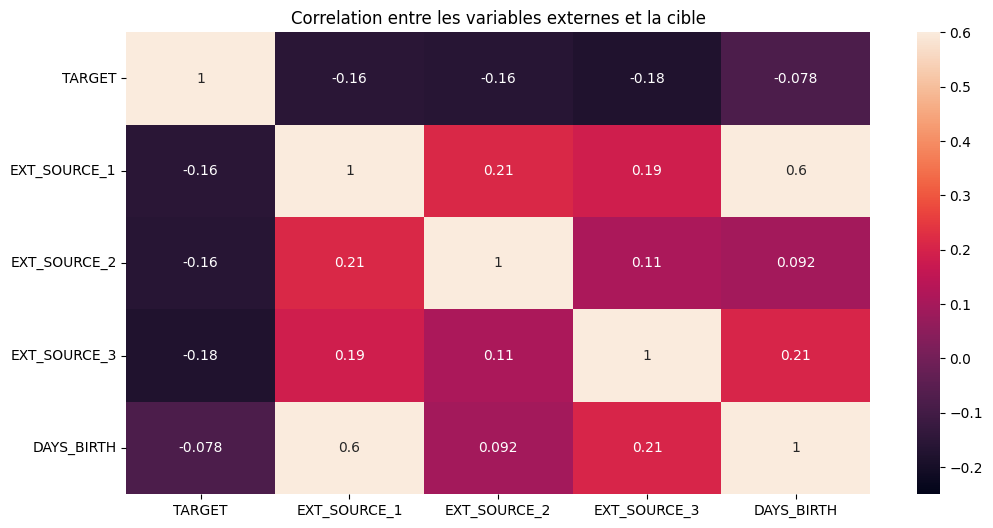

In [28]:
plt.figure(figsize = (12, 6))

sns.heatmap(ext_data_corrs, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation entre les variables externes et la cible')
plt.show()

La distribution de chacune de ces caractéristiques externes montre que `EXT_SOURCE_3` a la plus grande différence entre les valeurs de la cible. On peut clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un client rembourse un prêt.

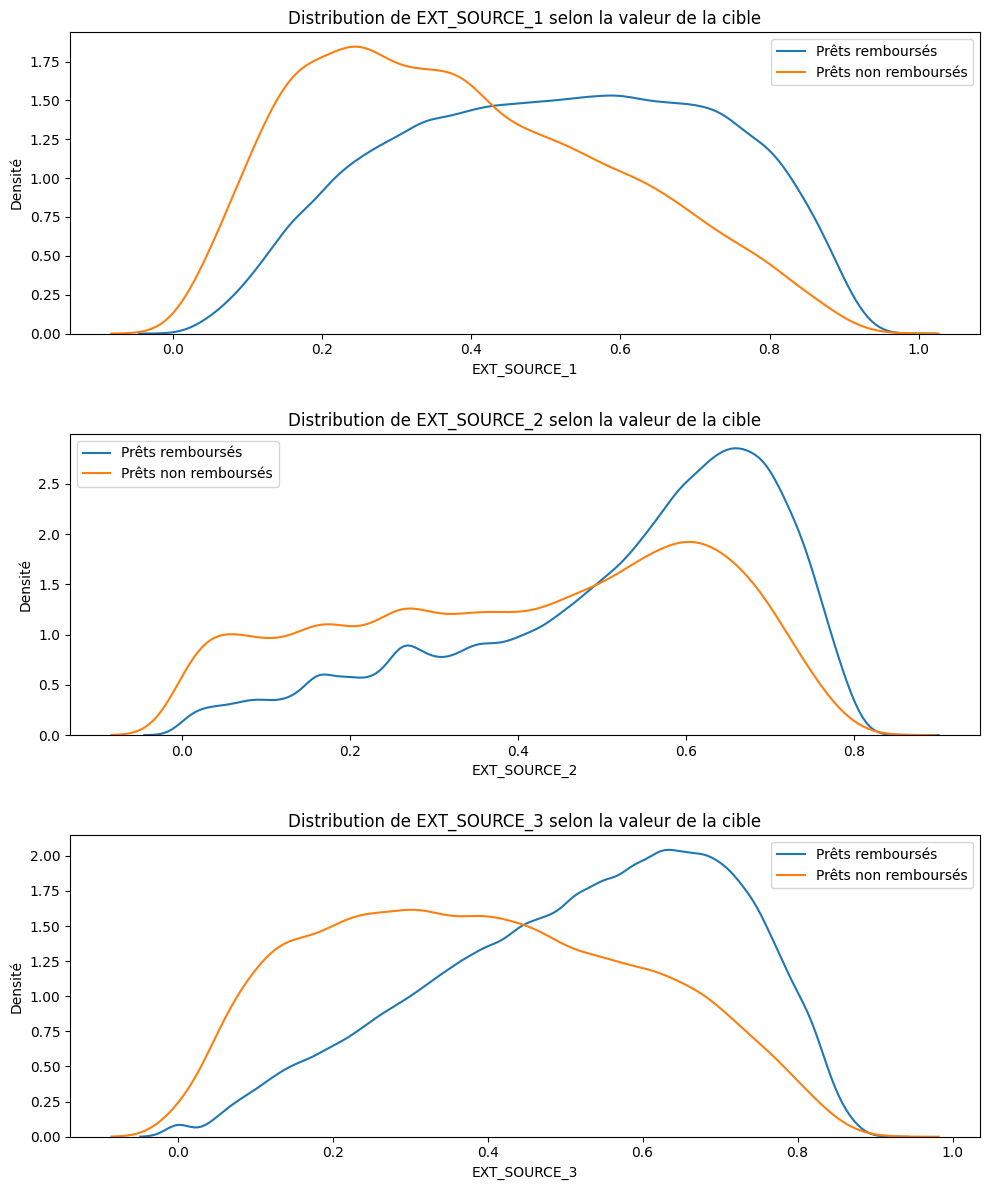

In [29]:
plt.figure(figsize = (10, 12))

# Itérer à travers les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Créer un nouveau sous-graphique pour chaque source
    plt.subplot(3, 1, i + 1)
    # tracer les prêts remboursés
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'Prêts remboursés')
    # tracer les prêts qui n'ont pas été remboursés
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'Prêts non remboursés')
    
    # Étiqueter les graphiques
    plt.title('Distribution de %s selon la valeur de la cible' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité')

    plt.legend()

plt.tight_layout(h_pad = 2.5)

## Sources externes vs Âge des clients

Il semble y avoir une relation linéaire positive modérée entre EXT_SOURCE_1 et DAYS_BIRTH (ou équivalemment YEARS_BIRTH), ce qui indique que cette caractéristique pourrait prendre en compte l'âge du client.

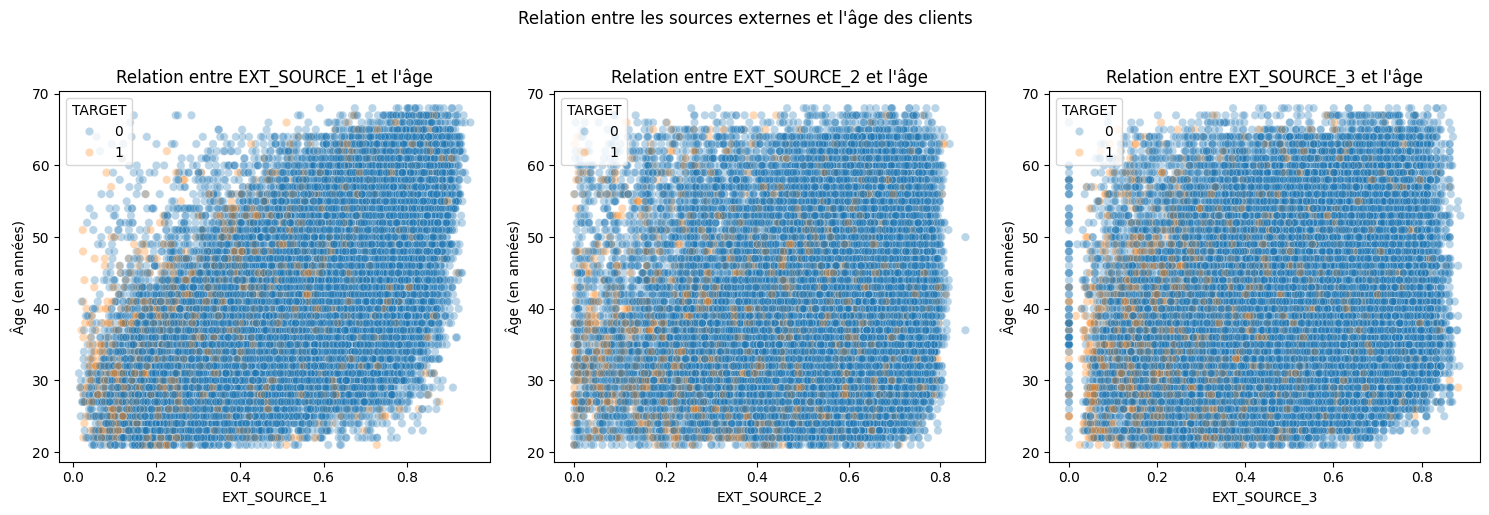

In [48]:
# Copier les données pour les visualiser
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Ajouter l'âge du client en années
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Supprimer les valeurs manquantes et limiter aux 100 000 premières lignes
plot_data = plot_data.dropna().loc[:100000, :]

# Liste des trois sources externes que vous voulez comparer à l'âge
sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Créer les scatter plots
plt.figure(figsize=(15, 5))

for i, source in enumerate(sources):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=plot_data, x=source, y='YEARS_BIRTH', hue='TARGET', alpha=0.3)
    plt.title(f'Relation entre {source} et l\'âge')
    plt.xlabel(source)
    plt.ylabel('Âge (en années)')

plt.suptitle('Relation entre les sources externes et l\'âge des clients', y=1.02)
plt.tight_layout()
plt.show()

# Feature Engineering

Nous procédons à une méthode simple de construction de nouvelles caractéristiques basée sur les connaissances métiers.

Nous pouvons créer quelques caractéristiques qui tentent de capturer ce que nous pensons être important pour déterminer si un client va faire défaut sur un prêt. Ici, nous allons utiliser cinq caractéristiques qui ont été inspirées par ce script d'Aguiar :

`CREDIT_INCOME_PERCENT` : le pourcentage du montant du crédit par rapport aux revenus d'un client \
`ANNUITY_INCOME_PERCENT` : le pourcentage de l'annuité du prêt par rapport aux revenus d'un client \
`CREDIT_TERM` : la durée du paiement en mois (puisque l'annuité est le montant dû mensuellement) \
`DAYS_EMPLOYED_PERCENT` : le pourcentage des jours travaillés par rapport à l'âge du client

In [31]:
df_train_domain = df_train.copy()
df_test_domain = df_test.copy()

df_train_domain['CREDIT_INCOME_PERCENT'] = df_train_domain['AMT_CREDIT'] / df_train_domain['AMT_INCOME_TOTAL']
df_train_domain['ANNUITY_INCOME_PERCENT'] = df_train_domain['AMT_ANNUITY'] / df_train_domain['AMT_INCOME_TOTAL']
df_train_domain['CREDIT_TERM'] = df_train_domain['AMT_ANNUITY'] / df_train_domain['AMT_CREDIT']
df_train_domain['DAYS_EMPLOYED_PERCENT'] = df_train_domain['DAYS_EMPLOYED'] / df_train_domain['DAYS_BIRTH']

In [32]:
df_test_domain['CREDIT_INCOME_PERCENT'] = df_test_domain['AMT_CREDIT'] / df_test_domain['AMT_INCOME_TOTAL']
df_test_domain['ANNUITY_INCOME_PERCENT'] = df_test_domain['AMT_ANNUITY'] / df_test_domain['AMT_INCOME_TOTAL']
df_test_domain['CREDIT_TERM'] = df_test_domain['AMT_ANNUITY'] / df_test_domain['AMT_CREDIT']
df_test_domain['DAYS_EMPLOYED_PERCENT'] = df_test_domain['DAYS_EMPLOYED'] / df_test_domain['DAYS_BIRTH']

#### Visualisation des nouvelles variables

Il est difficile de dire à l'avance si ces nouvelles caractéristiques seront utiles. La seule façon d'en être certain est de les essayer dans différents modèles.

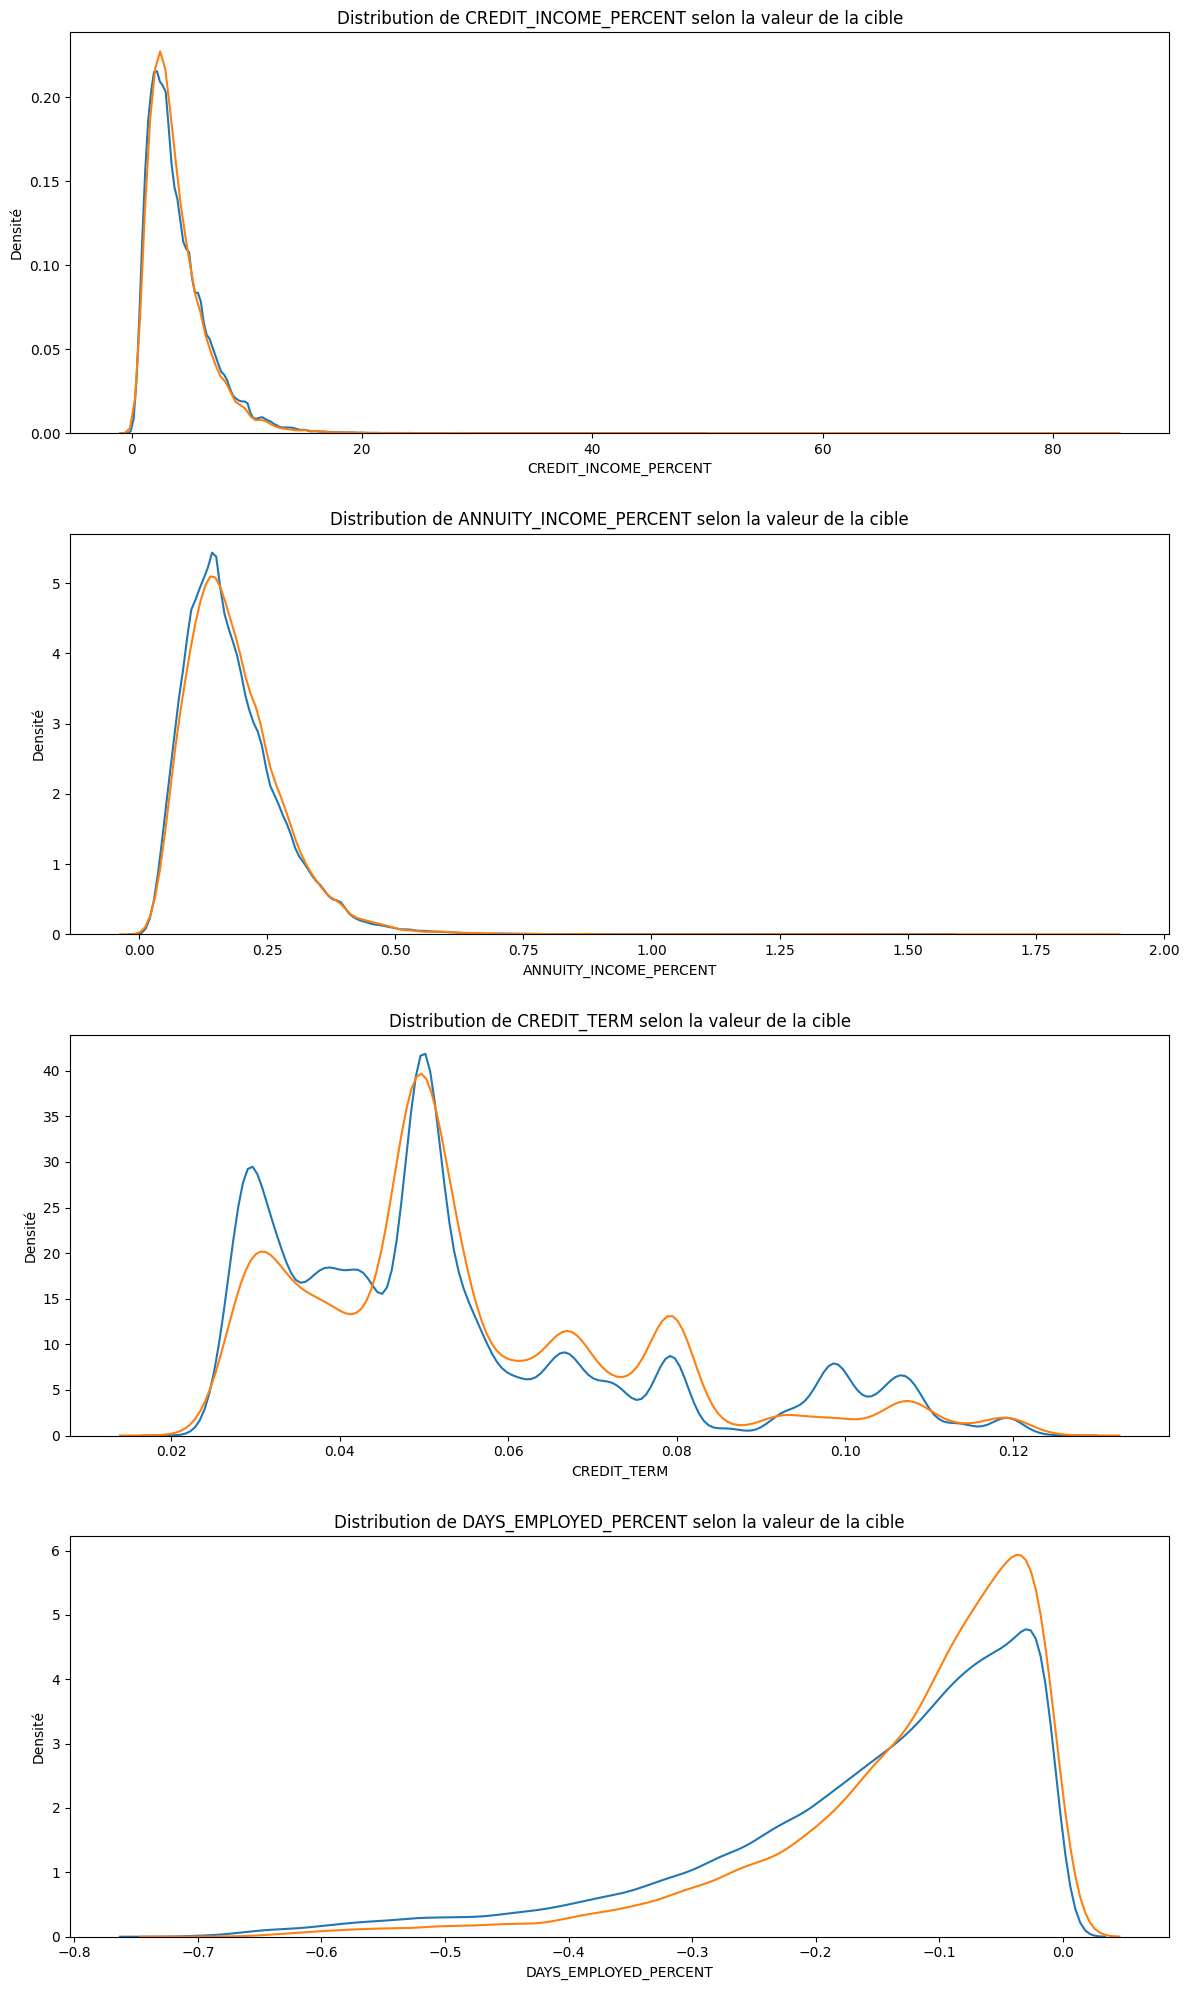

In [33]:
plt.figure(figsize = (12, 20))
# Itérer à travers les nouvelles caractéristiques
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # Créer un nouveau sous-graphique pour chaque caractéristique
    plt.subplot(4, 1, i + 1)
    # Tracer les prêts remboursés
    sns.kdeplot(df_train_domain.loc[df_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # Tracer les prêts non remboursés
    sns.kdeplot(df_train_domain.loc[df_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution de %s selon la valeur de la cible' % feature)
    plt.xlabel('%s' % feature)
    plt.ylabel('Densité')
    
plt.tight_layout(h_pad = 2.5)

In [34]:
# Exporter les datasets "métier" d'entraînement et de test
df_train_domain.to_csv('datasets/df_train_domain.csv', index = False)
df_test_domain.to_csv('datasets/df_test_domain.csv', index = False)

# Analyse du Data Drift

D’après l’analyse du data drift, sur un total de 243 colonnes, **11 colonnes** montrent des signes de dérive, soit environ **4,53%**.

In [35]:
df_drift_train = df_train_domain.drop(columns = ['SK_ID_CURR', 'TARGET'])
df_drift_test = df_test_domain.drop(columns = ['SK_ID_CURR'])
df_drift_test['DAYS_BIRTH'] = df_drift_test['DAYS_BIRTH'] * -1
df_drift_test['DAYS_EMPLOYED_PERCENT'] = df_drift_test['DAYS_EMPLOYED_PERCENT'] * -1

# Créer le rapport pour analyser le data drift
data_drift_report = Report(metrics=[
    DataDriftPreset()
])

# Calculer le drift entre train et test
data_drift_report.run(reference_data=df_drift_train, current_data=df_drift_test)

# Exporter le rapport en HTML
data_drift_report.save_html("SILALAK_Sengsathit_4_Tableau_HTML_data_drift_evidently_072024.html")